In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [2]:
titanic = pd.read_csv('../data/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Sex_category'] = titanic['Sex'].map({'female':0, 'male':1})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [5]:
titanic['Sex_category'] = titanic['Sex'].map({'female':0, 'male':1})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
# feature
X = titanic.drop('Survived', axis=1)
#target
y = titanic['Survived']

In [7]:
# The function train_test_split() randomly separate the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [8]:
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler 
scaler = StandardScaler()

# fit and transform training data
X_train = scaler.fit_transform(X_train)

# transform test data
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [ ]:
X.head(3)

,Pclass,Sex_category
0,3,1
1,1,0
2,3,0


In [ ]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Sex_category  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_category
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


**Building a model**


In [46]:
# features and target
X = titanic[['Pclass', 'Sex_category']]
y = titanic['Survived']


In [47]:
X.shape, y.shape


((891, 2), (891,))

In [48]:
#stratify is used to keep datasets in same(nearer) proportion
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)


In [49]:
y_train.value_counts(normalize=True)


0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [50]:
y_test.value_counts(normalize=True)


0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [51]:
X_train


,Pclass,Sex_category
702,3,0
776,3,1
381,3,0
275,1,0
16,3,1
...,...,...
353,3,1
137,1,1
494,3,1
430,1,1


In [52]:
y_train


702    0
776    0
381    1
275    1
16     0
      ..
353    0
137    0
494    0
430    1
589    0
Name: Survived, Length: 712, dtype: int64

In [53]:
# instatiate the model = classifier
model = LogisticRegression(max_iter=3000)
model

LogisticRegression(max_iter=3000)

In [54]:
# train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [55]:
# our coefficients = w0,w1
model.coef_, model.intercept_


(array([[-0.93971374, -2.67784038]]), array([3.19391894]))

**Evaluate the model**


In [56]:
# score on the training data
model.score(X_train, y_train)


0.797752808988764

In [57]:
# score on the testing data
model.score(X_test, y_test)

0.7430167597765364

In [58]:
y_test = [1, 1, 1, 0, 0, 0, 1, 0]
y_proba = [0.9, 0.7, 0.1, 0.2, 0.4, 0.6, 0.7, 0.1]

In [59]:
# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = [1 
          if p>= 0.5\
          else 0\
          for p in y_proba]
y_pred

[1, 1, 0, 0, 0, 1, 1, 0]

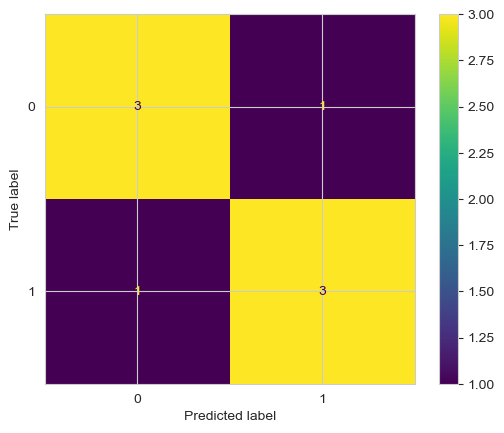

In [60]:
# Sklearn has an inbuilt Confusion Matrix Display class:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize=None);

Text(0.5, 1.0, 'Confusion Matrix')

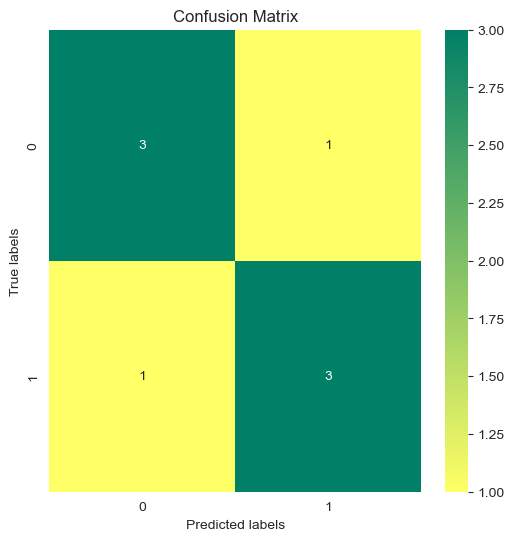

In [61]:
# Confusion Matrix using Seaborn Heatmap
conf = confusion_matrix(y_test,y_pred)

#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, cmap='summer_r', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [62]:

# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score:", acc)


Accuracy score: 0.75


In [63]:

# Calculate the precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.75


In [64]:

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)



Recall: 0.75
